## Final plots for report

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [112]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

## 1. Aggregate Data

In [113]:
nyse_data_path = '../rejection/nyse-o/compare_100/'
sp1 = '../rejection/sp500/compare_1/'
sp100 = '../rejection/sp500/compare_100-bad/'

## 1.1 NYSE

In [117]:
files = os.listdir(nyse_data_path)
files

['Compare_100_2018-01-18 00:32:31',
 'Compare_100_2018-01-17 23:17:58',
 'Compare_100_2018-01-18 01:17:40',
 'Compare_100_2018-01-17 23:35:41',
 'Compare_100_2018-01-17 20:34:47',
 'Compare_100_2018-01-18 01:10:55',
 'Compare_100_2018-01-17 23:13:38',
 'Compare_100_2018-01-17 22:39:53',
 'Compare_100_2018-01-17 20:01:05',
 'Compare_100_2018-01-17 22:58:08',
 'Compare_100_2018-01-17 23:35:42']

In [120]:
dfs = []

for f in files:
    df = pd.read_csv(nyse_data_path + f)
    dfs.append(df)
    
nyse_data = pd.concat(dfs, axis=0, ignore_index=True)
nyse_data= nyse_data.drop(columns=['Unnamed: 0'])

nyse_data['Wealth Difference'] =  nyse_data['Wealth'] - nyse_data['No Risk Wealth']
nyse_data['Wealth prop diff'] =  (nyse_data['Wealth'] - nyse_data['No Risk Wealth']) / nyse_data['No Risk Wealth']

In [121]:
# all_data.head(10)
nyse_data.describe()

,Beta Range,Alpha,Gamma,Eta,Max Risk,Wealth,No Risk Wealth,Wealth Difference,Wealth prop diff
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1.100000e+03,1.100000e+03,1.100000e+03
mean,101.067273,0.203045,0.003646,0.771455,0.974727,23.240022,1.666299e+01,6.577029e+00,5.874941e+04
std,81.697967,0.128961,0.003530,0.457933,0.289351,11.329711,1.095889e+01,9.767410e+00,1.492137e+06
min,21.000000,0.000000,0.000000,0.000000,0.500000,0.000140,1.888940e-07,-2.176420e+01,-4.493513e-01
25%,42.000000,0.100000,0.001000,0.400000,0.750000,15.051585,1.084368e+01,7.552359e-11,2.831727e-12
50%,63.000000,0.200000,0.002500,0.800000,1.000000,26.598582,1.416210e+01,4.203695e+00,3.649187e-01
75%,126.000000,0.300000,0.005000,1.200000,1.250000,26.749613,2.021331e+01,1.302029e+01,1.127740e+00
max,252.000000,0.400000,0.010000,1.500000,1.450000,118.394070,5.373013e+01,1.156722e+02,4.836919e+07


## 1.2 S&P

In [65]:
files = os.listdir(sp100)
files

['2018-04-18 06:04:33',
 '2018-04-18 06:13:48',
 '2018-04-18 06:11:18',
 '2018-04-18 05:53:57',
 '2018-04-18 05:57:56',
 '2018-04-18 05:33:02',
 '2018-04-18 06:12:29',
 '2018-04-18 06:06:51']

In [106]:
dfs = []

for f in files:
    df = pd.read_csv(sp100 + f)
    dfs.append(df)
    
all_data = pd.concat(dfs, axis=0, ignore_index=True)
all_data = all_data.drop(columns=['Unnamed: 0'])

all_data['Wealth Difference'] =  all_data['Wealth'] - all_data['No Risk Wealth']
all_data['Wealth prop diff'] =  (all_data['Wealth'] - all_data['No Risk Wealth']) / all_data['No Risk Wealth']

all_data.describe()

,Beta Range,Alpha,Gamma,Eta,Max Risk,Wealth,No Risk Wealth,Wealth Difference,Wealth prop diff
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,8.000000e+02,800.000000,8.000000e+02
mean,101.272500,0.150125,0.003919,19.696250,0.986937,0.374365,1.911982e-01,0.183167,5.513585e+03
std,84.015752,0.112654,0.003552,6.820897,0.291528,0.374717,2.499989e-01,0.263440,6.339655e+04
min,21.000000,0.000000,0.000000,8.000000,0.500000,0.000002,4.526169e-08,-0.324815,-4.094607e-01
25%,42.000000,0.000000,0.001000,14.000000,0.750000,0.047960,1.874919e-03,0.014205,4.514002e-01
50%,63.000000,0.200000,0.002500,20.000000,1.000000,0.264033,4.677440e-02,0.071064,2.273262e+00
75%,126.000000,0.200000,0.005000,25.000000,1.250000,0.628703,2.694425e-01,0.261830,1.613143e+01
max,252.000000,0.300000,0.010000,31.000000,1.450000,2.365258,8.806732e-01,1.767166,1.378616e+06


## 2 Basic visualization

## 2.1 Difference in wealth vs. beta

In [127]:
nyse_data.describe()

,Beta Range,Alpha,Gamma,Eta,Max Risk,Wealth,No Risk Wealth,Wealth Difference,Wealth prop diff
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1.100000e+03,1.100000e+03,1.100000e+03
mean,101.067273,0.203045,0.003646,0.771455,0.974727,23.240022,1.666299e+01,6.577029e+00,5.874941e+04
std,81.697967,0.128961,0.003530,0.457933,0.289351,11.329711,1.095889e+01,9.767410e+00,1.492137e+06
min,21.000000,0.000000,0.000000,0.000000,0.500000,0.000140,1.888940e-07,-2.176420e+01,-4.493513e-01
25%,42.000000,0.100000,0.001000,0.400000,0.750000,15.051585,1.084368e+01,7.552359e-11,2.831727e-12
50%,63.000000,0.200000,0.002500,0.800000,1.000000,26.598582,1.416210e+01,4.203695e+00,3.649187e-01
75%,126.000000,0.300000,0.005000,1.200000,1.250000,26.749613,2.021331e+01,1.302029e+01,1.127740e+00
max,252.000000,0.400000,0.010000,1.500000,1.450000,118.394070,5.373013e+01,1.156722e+02,4.836919e+07


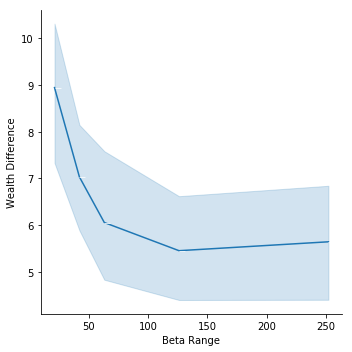

In [128]:
fig = sns.relplot(x='Beta Range', y='Wealth Difference',
                   kind="line",
                  data=nyse_data, marker=True,)

Text(0.5,6.8,'Maximum allowed risk')

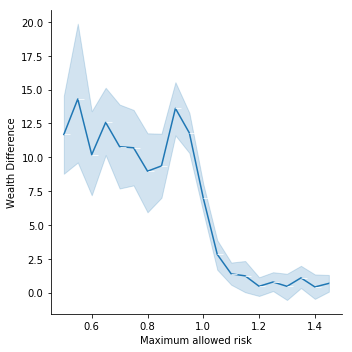

In [129]:
fig = sns.relplot(x='Max Risk', y='Wealth Difference',
                   kind="line",
                  data=nyse_data, marker=True,)
plt.xlabel('Maximum allowed risk')

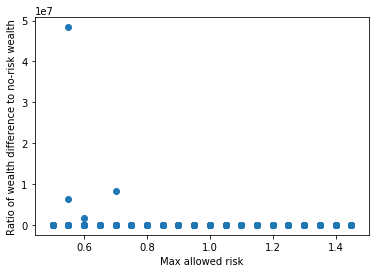

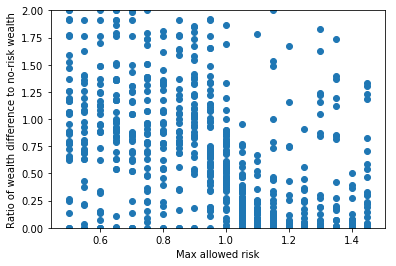

In [131]:
x = nyse_data['Max Risk']
y = nyse_data['Wealth prop diff']

plt.scatter(x, y)
plt.xlabel('Max allowed risk')
plt.ylabel('Ratio of wealth difference to no-risk wealth')
plt.show()

plt.scatter(x, y)
plt.ylim(0, 2)
plt.xlabel('Max allowed risk')
plt.ylabel('Ratio of wealth difference to no-risk wealth')
plt.show()

Across all parameters at low levels of allowed risk, the rejection strategy showed higher returns, both absolutely and relative to the size of welath aggregated. At higher allowed risk ,the wealth appread to dissipate to 25-50% of its non-risk limited value.

## 2.3 NYSE High-performing results

In [134]:
nyse_high = nyse_data[nyse_data['Wealth'] >25]
nyse_high.describe()

,Beta Range,Alpha,Gamma,Eta,Max Risk,Wealth,No Risk Wealth,Wealth Difference,Wealth prop diff
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,6.010000e+02,6.010000e+02,6.010000e+02
mean,104.545757,0.197587,0.003272,0.774210,0.814975,30.809603,2.123353e+01,9.576075e+00,8.049793e+04
std,83.379604,0.120789,0.003266,0.472917,0.255719,8.872820,1.209706e+01,1.173633e+01,1.973020e+06
min,21.000000,0.000000,0.000000,0.000000,0.500000,25.044629,5.513944e-07,-2.176420e+01,-4.493513e-01
25%,42.000000,0.100000,0.001000,0.400000,0.600000,26.670504,1.228163e+01,7.552359e-11,2.831727e-12
50%,63.000000,0.200000,0.002500,0.800000,0.750000,26.670504,1.635489e+01,1.181702e+01,7.368447e-01
75%,126.000000,0.300000,0.005000,1.200000,0.950000,31.166067,2.762297e+01,1.550994e+01,1.260340e+00
max,252.000000,0.400000,0.010000,1.500000,1.450000,118.394070,5.373013e+01,1.156722e+02,4.836919e+07


Text(0.5,1,'Impact of a maximal risk allowance on high-performing metrics of portfolio optimization')

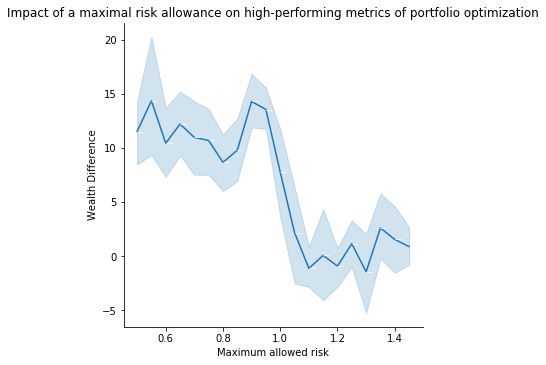

In [136]:
fig = sns.relplot(x='Max Risk', y='Wealth Difference',
                   kind="line",
                  data=nyse_high, marker=True,)
plt.xlabel('Maximum allowed risk')
plt.title('Impact of a maximal risk allowance on high-performing metrics of portfolio optimization')

Even at the upper end, the algorithms only improves with risky portfolios not being allowed.